# Iris 품종 예측

In [26]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## 보기 편하게 데이터프레임으로 변환하여 만들어줌

* iris.target - 라벨링 된 아이리스 품종 값

* iris.target_names - 아이리스 품종 이름 값

* iris.feature_names - 데이터셋의 피처 이름 값

In [25]:
iris = load_iris()
iris_target = iris.target
iris_data = iris.data
iris_feature_names = iris.feature_names

iris = pd.DataFrame(iris_data, columns=iris_feature_names)
iris['target'] = iris_target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 결측치,이상치가 있는지 확인하기 위해 .info 사용

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


## Train, Test 셋 분리

 input X 값과 결과 y 값을 나눠줌

In [20]:
X_train_df = iris.drop(columns='target')
y_train_df = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2, random_state = 11)

## 다양한 모델을 이용하여 정확도를 확인
* KNN
* Decision Tree
* RandomForest
* SVM

In [23]:
models = list()
model_knn = KNeighborsClassifier()
model_df = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svm = SVC(kernel = 'rbf')
models.append(model_knn)
models.append(model_df)
models.append(model_rf)
models.append(model_svm)

for model in models:
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, model_pred)
    print(f'{model} 모델 정확도 : {accuracy : .4f}')

KNeighborsClassifier() 모델 정확도 :  0.9667
DecisionTreeClassifier() 모델 정확도 :  0.9333
RandomForestClassifier() 모델 정확도 :  0.9333
SVC() 모델 정확도 :  0.9333


## 모델 별 결과 시각화

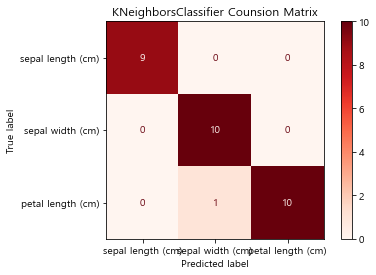

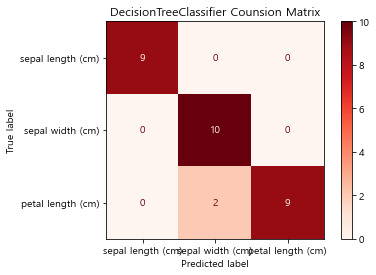

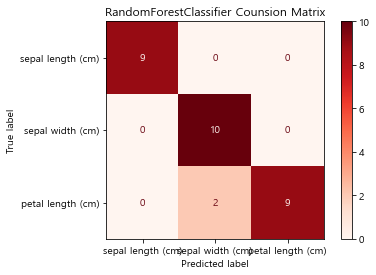

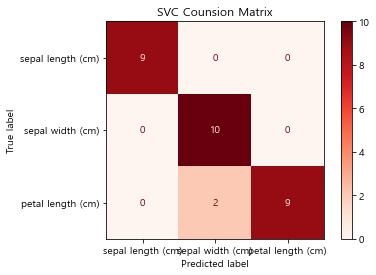

In [38]:
for model in models:
    disp = plot_confusion_matrix(model,
                                X_test, y_test,
                                display_labels=iris_feature_names,
                                cmap=plt.cm.Reds)
    
    disp.ax_.set_title(str(model)[:-2] + ' Counsion Matrix')